# analysis of pp-SRC c.m. momentum simulations

# imports

In [1]:
from notebook_tools import *
import ast ,matplotlib.patches as patches
%matplotlib inline

In [2]:
nominal_values=dict({'SigmaT_C12':0.167,'SigmaT_err_C12':0.006,
                     'a1_C12':0.143,'a1_err_C12':0.075,'a2_C12':0.158,'a2_err_C12':0.009,
                     'b1_C12':0.562,'b1_err_C12':0.078,'b2_C12':0.159,'b2_err_C12':0.009})

# read data

In [3]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs1600000to1760000_results.csv')

In [4]:
# PvalTotal
for target in ['12C','27Al','56Fe','208Pb']:
    sims['PvalTotal_%s'%target] = Fisher_combination_Pvals_pandas([sims['PvalSigmaX_unweighted_%s'%target],
                                                                   sims['PvalSigmaY_unweighted_%s'%target],
                                                                   sims['PvalSigmaZa1_unweighted_%s'%target],
                                                                   sims['PvalSigmaZa2_unweighted_%s'%target], 
                                                                   sims['PvalMeanZa1_unweighted_%s'%target],
                                                                   sims['PvalMeanZa2_unweighted_%s'%target]         
                                                                  ])
    print 'average PvalTotal %s:'%target,np.average(sims['PvalTotal_%s'%target])

average PvalTotal 12C: 0.000625622272196
average PvalTotal 27Al: 0.00101101287582
average PvalTotal 56Fe: 5.14922614291e-07
average PvalTotal 208Pb: 0.000228247408284


In [5]:
def draw_PvalWeighting_2d( df , v1 , v2 , bins=40 ,
                          weights=None, w_label=None , cmap='Greys' ,
                          xlabel=None , ylabel=None ,                         
                          figsize=(10,10), title=None, do_save_fig=False,
                          do_add_nominal_values=False, suffix='',      
                          nominal_v1=None,nominal_v1_err=None,                       
                          nominal_v2=None,nominal_v2_err=None,
                          x_ranges=None,y_ranges=None):
    
    fig,ax=plt.subplots(figsize=figsize)
    sum_weights = len(df)*np.average(df[v1],weights=weights)
    print 'sum_weights:',sum_weights
    plt.hist2d(df[v1],df[v2],bins=bins,weights=weights/sum_weights,cmap=cmap); # 0.01 offset to draw the plot nicely
    ax.add_patch( patches.Rectangle((np.min(df[v1]), np.min(df[v2])),
                                     np.max(df[v1])-np.min(df[v1]) ,
                                     np.max(df[v2])-np.min(df[v2]),        
                                     fill=True, linewidth=3 , color='green', alpha=0.1
                                    ))
#     print 'min of ',v1,'is',np.min(df[v1])
#     print 'max of ',v1,'is',np.max(df[v1])
#     print 'min of ',v2,'is',np.min(df[v2])
#     print 'max of ',v2,'is',np.max(df[v2])
    if y_ranges is None:
        ax.set_ylim(np.min(df[v2])-0.1*np.abs(np.min(df[v2])),np.max(df[v2])+0.1*np.abs(np.max(df[v2])))
    else: 
        ax.set_ylim(y_ranges)
    if x_ranges is None:
        ax.set_xlim(np.min(df[v1])-0.1*np.abs(np.min(df[v1])),np.max(df[v1])+0.1*np.abs(np.max(df[v1])))
    else: 
        ax.set_xlim(x_ranges)


    cb=plt.colorbar()
    cb.ax.tick_params(labelsize=30)
    set_axes( ax , xlabel , ylabel , fontsize=30)
    if do_add_nominal_values:
           
        ax.add_patch( patches.Rectangle((nominal_v1-nominal_v1_err, nominal_v2-nominal_v2_err),
                                        2*nominal_v1_err,
                                        2*nominal_v2_err,        
                                        fill=False, linewidth=3 , color='blue'
                                       ))

    if do_save_fig: 
        plt.savefig('/Users/erezcohen/Desktop/DataMining/AccCorr_ppSRCAnalysisNote/all_figures/AccCorr_'+v1+'_'+v2+'_'+w_label+suffix+'.pdf')
    



In [6]:
def draw_all_PvalWeighting_2d(v1='SigmaZa1' , v2='SigmaZa2' ,
                              xlabel='$\\sigma_{z}-a_{1}$',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]' ,
                              bins=40,
                              figsize=(10,10),
                              weights=None,
                              w_labels=None,
                              do_save_fig=False,
                              draw_generated=False,
                              do_add_nominal_values=False, 
                              nominal_v1=None,nominal_v1_err=None,                                                            
                              nominal_v2=None,nominal_v2_err=None,
                              do_draw=None,suffix='',
                              x_ranges=None,y_ranges=None):
    
    for weight,w_label,do_showplot in zip(weights,w_labels,do_draw):
        
        if weight is None:
            if draw_generated and do_showplot:
                draw_PvalWeighting_2d( sims , 'gen'+v1 , 'gen'+v2 , bins=bins , weights=weight, w_label=w_label  , cmap='hot_r' ,
                                  xlabel=xlabel,ylabel=ylabel, figsize=figsize , title='no weighting' , do_save_fig=do_save_fig);
        elif do_showplot:
            print 'ploting histogram weighted by',weight
            title=weight
            weight=sims[weight]
            draw_PvalWeighting_2d( sims , 'gen'+v1 , 'gen'+v2 , bins=bins , weights=weight, w_label=w_label  , cmap='hot_r' ,
                                  xlabel=xlabel,ylabel=ylabel, figsize=figsize , title=title , do_save_fig=do_save_fig,
                                  do_add_nominal_values=do_add_nominal_values,
                                  nominal_v1=nominal_v1,
                                  nominal_v1_err=nominal_v1_err,
                                  nominal_v2=nominal_v2,
                                  nominal_v2_err=nominal_v2_err,
                                  suffix=suffix,x_ranges=x_ranges,y_ranges=y_ranges);



In [14]:
def plot_SigmaT_correlationWithOthers(v2='SigmaZa1',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]',binsy=30,
                                      v1='SigmaX',xlabel='$\\sigma_{x}$ [Gev/c]', binsx=30,
                                      target='12C',do_save_fig=False,
                                      do_add_nominal_values=False,
                                      nominal_v1=None,nominal_v1_err=None,
                                      nominal_v2=None,nominal_v2_err=None,
                                      do_draw=None,suffix='',                             
                                      x_ranges=None,y_ranges=None): 
    
    weights = [None , 'PvalSigmaT%s_%s'%(v2,target) , 'PvalTotal_unweighted_%s'%target, 'Pvaltot_pandas_%s'%target, 'PvalTotal_%s'%target  ]
    w_labels = ['NoWeights','PvalSigmaT%s_%s'%(v2,target),'PvalTotal_%s'%target,'Pvaltot_pandas_%s'%target ,'PvalTotal_%s'%target]
    
    draw_all_PvalWeighting_2d(v1=v1 , v2=v2 ,
                              xlabel=xlabel,ylabel=ylabel ,
                              bins=(binsx,binsy),
                              figsize=(15,10),
                              weights=weights, 
                              w_labels=w_labels,
                              do_add_nominal_values=do_add_nominal_values,
                              do_save_fig=do_save_fig,
                              nominal_v1=nominal_v1,
                              nominal_v1_err=nominal_v1_err,
                              nominal_v2=nominal_v2,
                              nominal_v2_err=nominal_v2_err,
                              do_draw=do_draw,
                              suffix=suffix,x_ranges=x_ranges,y_ranges=y_ranges)



In [8]:
def plot_correlation(v2='SigmaZa1',ylabel='$\\sigma_{z}-a_{2}$ [GeV/c]',binsy=30,
                     v1='SigmaX',xlabel='$\\sigma_{x}$ [Gev/c]', binsx=30,
                     target='12C',do_save_fig=False,
                     do_add_nominal_values=False,
                     nominal_v1=None,nominal_v1_err=None,
                     nominal_v2=None,nominal_v2_err=None,
                     do_draw=None,suffix='',                             
                     x_ranges=None,y_ranges=None): 
    
    weights = [None , 'Pval%s%s_%s'%(v1,v2,target) , 'PvalTotal_unweighted_%s'%target, 'Pvaltot_pandas_%s'%target, 'PvalTotal_%s'%target  ]
    w_labels = ['NoWeights','Pval%s%s_%s'%(v1,v2,target),'PvalTotal_%s'%target,'Pvaltot_pandas_%s'%target ,'PvalTotal_%s'%target]
    
    draw_all_PvalWeighting_2d(v1=v1 , v2=v2 ,
                              xlabel=xlabel,ylabel=ylabel ,
                              bins=(binsx,binsy),
                              figsize=(15,10),
                              weights=weights, 
                              w_labels=w_labels,
                              do_add_nominal_values=do_add_nominal_values,
                              do_save_fig=do_save_fig,
                              nominal_v1=nominal_v1,
                              nominal_v1_err=nominal_v1_err,
                              nominal_v2=nominal_v2,
                              nominal_v2_err=nominal_v2_err,
                              do_draw=do_draw,
                              suffix=suffix,x_ranges=x_ranges,y_ranges=y_ranges)




ploting histogram weighted by PvalSigmaTSigmaZa1_12C
sum_weights: 24800.0
ploting histogram weighted by PvalTotal_unweighted_12C
sum_weights: 24800.0
ploting histogram weighted by PvalTotal_12C
sum_weights: 24800.0


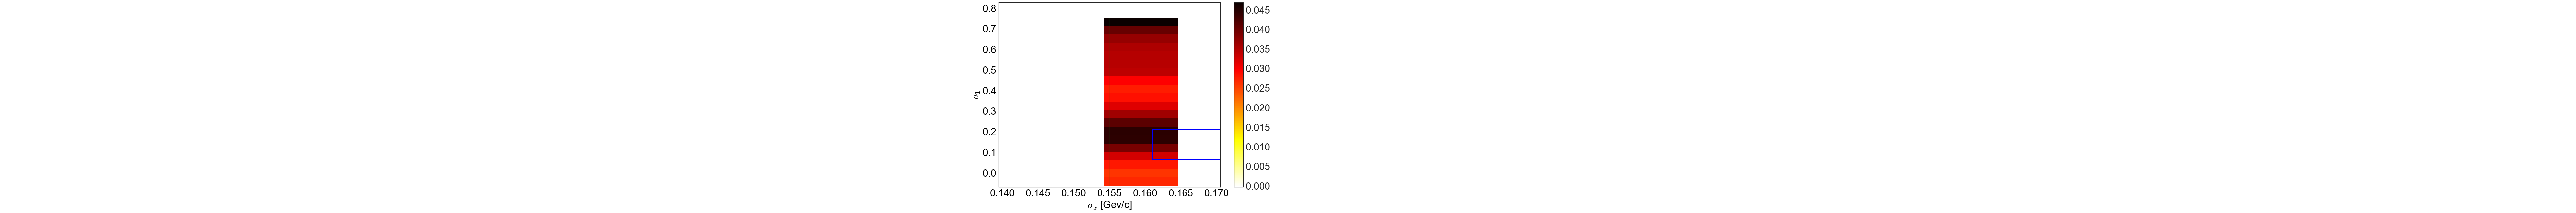

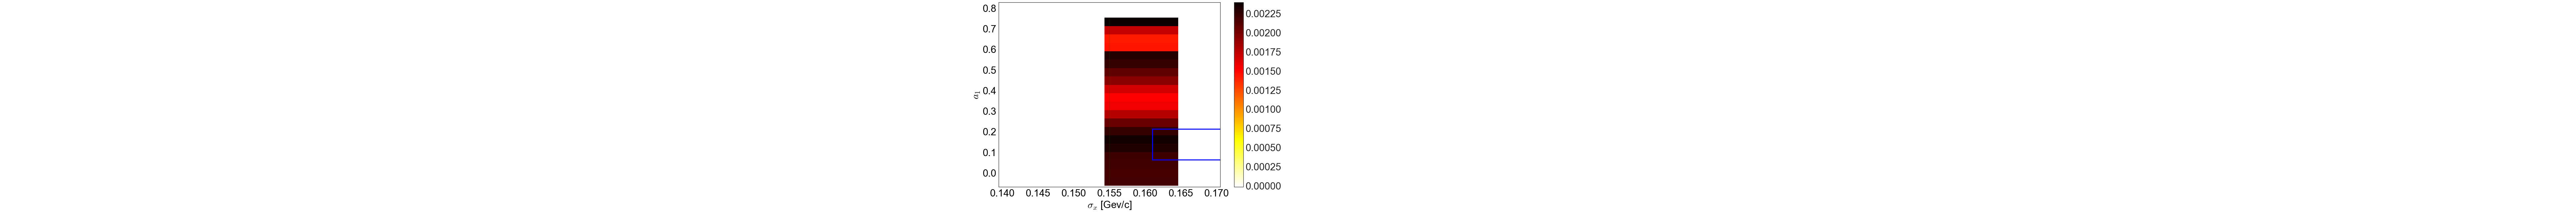

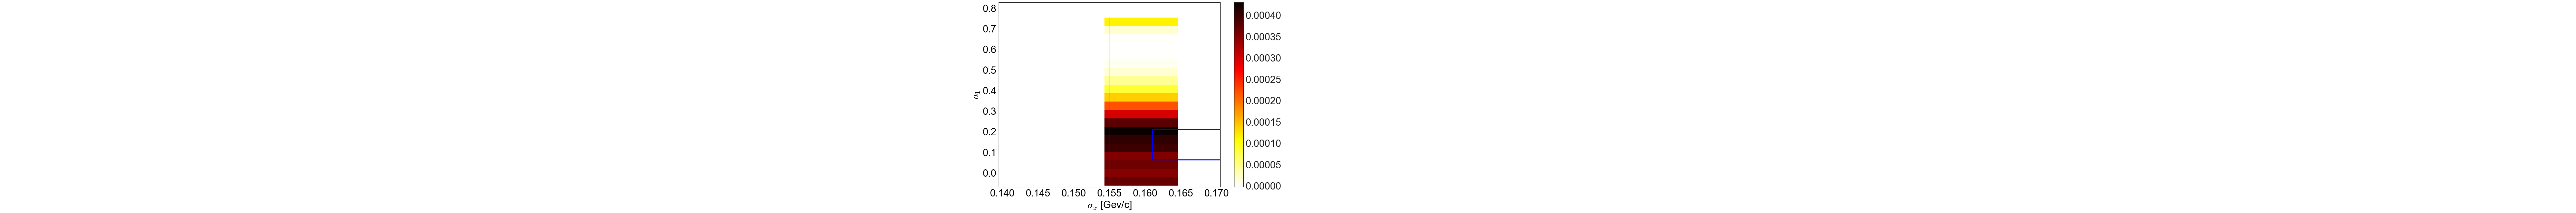

In [17]:
do_save_fig=False
do_add_nominal_values=True
target='C12'
do_draw = [False , True , True , False , True ]
binsx=np.linspace(0,0.36,36)#np.linspace(0.04,0.26,31)
binsy=20
plot_SigmaT_correlationWithOthers(v2='SigmaZa1',ylabel='$a_{1}$',
                                  nominal_v1=nominal_values['SigmaT_%s'%target],nominal_v1_err=nominal_values['SigmaT_err_%s'%target],
                                  nominal_v2=nominal_values['a1_%s'%target],nominal_v2_err=nominal_values['a1_err_%s'%target],
                                  do_add_nominal_values=do_add_nominal_values,do_save_fig=do_save_fig,binsx=binsx,binsy=binsy,
                                  do_draw=do_draw)
# plot_SigmaT_correlationWithOthers(v2='SigmaZa2',ylabel='$a_{2}$ [GeV/c]',          
#                                   nominal_v1=nominal_values['SigmaT_%s'%target],nominal_v1_err=nominal_values['SigmaT_err_%s'%target],
#                                   nominal_v2=nominal_values['a2_%s'%target],nominal_v2_err=nominal_values['a2_err_%s'%target],
#                                   do_add_nominal_values=do_add_nominal_values,do_save_fig=do_save_fig,binsx=binsx,binsy=binsy,
#                                   do_draw=do_draw)
# plot_SigmaT_correlationWithOthers(v2='MeanZa1',ylabel='$b_{1}$',
#                                   nominal_v1=nominal_values['SigmaT_%s'%target],nominal_v1_err=nominal_values['SigmaT_err_%s'%target],
#                                   nominal_v2=nominal_values['b1_%s'%target],nominal_v2_err=nominal_values['b1_err_%s'%target],
#                                   do_add_nominal_values=do_add_nominal_values,do_save_fig=do_save_fig,binsx=binsx,binsy=binsy,
#                                   do_draw=do_draw)
# plot_SigmaT_correlationWithOthers(v2='MeanZa2',ylabel='$b_{2}$ [GeV/c]',
#                                   nominal_v1=nominal_values['SigmaT_%s'%target],nominal_v1_err=nominal_values['SigmaT_err_%s'%target],
#                                   nominal_v2=nominal_values['b2_%s'%target],nominal_v2_err=nominal_values['b2_err_%s'%target],
#                                   do_add_nominal_values=do_add_nominal_values,do_save_fig=do_save_fig,binsx=binsx,binsy=binsy,
#                                   do_draw=do_draw)

In [3]:
# read all our runs results
sims_files = []
sims_list , sims_files = os.listdir('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/') , [] 
for file in sims_list:                                                                                        
    print 'adding ',file
    sims_files.append(pd.read_csv(('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/'+file)))

sims=pd.concat(sims_files)
sims.fillna(0.0,inplace=True)
print 'len:',len(sims) 

adding  runs1000000to1100000_20SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_10NRand_results.csv
adding  runs1100000to1400000_30SigmaT_10SigmaZa1_10SigmaZa2_10MeanZa1_10MeanZa2_10NRand_results.csv
adding  runs1400000to1500000_results.csv
adding  runs1500000to1501000_NsigmaT_1_NSigmaZa1_1_NSigmaZa2_1_NMeanZa1_1_NMeanZa2_1000_NRand_10_simulationruns_results.csv
adding  runs1501000to1502000_NsigmaT_1_NSigmaZa1_1_NSigmaZa2_1_NMeanZa1_1_NMeanZa2_1000_NRand_10_simulationruns_results.csv
adding  runs1502000to1503000_NsigmaT_1_NSigmaZa1_1_NSigmaZa2_1_NMeanZa1_1_NMeanZa2_1000_NRand_10_simulationruns_results.csv
adding  runs1503000to1504000_NsigmaT_1_NSigmaZa1_1_NSigmaZa2_1_NMeanZa1_1_NMeanZa2_1000_NRand_10_simulationruns_results.csv
adding  runs1504000to1505000_NsigmaT_1_NSigmaZa1_1000_NSigmaZa2_1_NMeanZa1_1_NMeanZa2_1_NRand_10_simulationruns_results.csv
adding  runs1505000to1506000_NsigmaT_1_NSigmaZa1_1_NSigmaZa2_1000_NMeanZa1_1_NMeanZa2_1_NRand_10_simulationruns_results.csv
adding  runs150

In [10]:
# the originak plot that works is: 
# sims70=pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs700000to756268_100SigmaT_5SigmaZa1_5SigmaZa2_5MeanZa1_5MeanZa2_10NRand_results.csv')
# sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs1000000to1400000_results.csv')
# sims=sims[sims.run>1100000]
for target in ['12C','27Al','56Fe','208Pb']:
    sims['PvalTotal_%s'%target] = Fisher_combination_Pvals_pandas([sims['PvalSigmaX_unweighted_%s'%target],
                                                                   sims['PvalSigmaY_unweighted_%s'%target],
                                                                   sims['PvalSigmaZa1_unweighted_%s'%target],
                                                                   sims['PvalSigmaZa2_unweighted_%s'%target], 
                                                                   sims['PvalMeanZa1_unweighted_%s'%target],
                                                                   sims['PvalMeanZa2_unweighted_%s'%target]         
                                                                  ])

    sims['PvalTot_tw_%s'%target] = Fisher_combination_Pvals_pandas([sims['PvalSigmaX_tw_%s'%target],
                                                                   sims['PvalSigmaY_tw_%s'%target],
                                                                   sims['PvalSigmaZa1_tw_%s'%target],
                                                                   sims['PvalSigmaZa2_tw_%s'%target], 
                                                                   sims['PvalMeanZa1_tw_%s'%target],
                                                                   sims['PvalMeanZa2_tw_%s'%target]         
                                                                  ])


